In [10]:
import tensorflow as tf

# CIFAR-10 데이터셋 불러오기
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# 데이터 정규화
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# 원 핫 인코딩
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

# 모델 생성
#act = tf.keras.layers.LeakyReLU(alpha=0.3)
act = 'relu'
#init = tf.keras.initializers.he_uniform()

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation=act, padding='same', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(64, (3, 3), activation=act, padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(64, (3, 3), activation=act, padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(64, (3, 3), activation=act, padding='same'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation=act),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

# 모델 컴파일
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

# 데이터 증강 적용
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1
)

# 증강된 데이터 생성
datagen.fit(x_train)

# 모델 학습
model.fit(datagen.flow(x_train, y_train, batch_size=64),
          epochs=10, steps_per_epoch=len(x_train) // 64,
          validation_data=(x_test, y_test))

# 모델 저장
model.save('cifar10_model.h5')


Epoch 1/10
781/781 [==============================] - 27s 33ms/step - loss: 1.7008 - accuracy: 0.3851 - val_loss: 1.4322 - val_accuracy: 0.5013
Epoch 2/10
781/781 [==============================] - 26s 33ms/step - loss: 1.3808 - accuracy: 0.5075 - val_loss: 1.1287 - val_accuracy: 0.5965
Epoch 3/10
781/781 [==============================] - 26s 33ms/step - loss: 1.2273 - accuracy: 0.5694 - val_loss: 1.0107 - val_accuracy: 0.6485
Epoch 4/10
781/781 [==============================] - 26s 33ms/step - loss: 1.1161 - accuracy: 0.6125 - val_loss: 1.2343 - val_accuracy: 0.6033
Epoch 5/10
781/781 [==============================] - 26s 33ms/step - loss: 1.0398 - accuracy: 0.6436 - val_loss: 0.9596 - val_accuracy: 0.6741
Epoch 6/10
781/781 [==============================] - 26s 33ms/step - loss: 0.9817 - accuracy: 0.6664 - val_loss: 0.9081 - val_accuracy: 0.6889
Epoch 7/10
781/781 [==============================] - 26s 33ms/step - loss: 0.9417 - accuracy: 0.6805 - val_loss: 0.9441 - val_accuracy:

c:\users\sou05094\appdata\local\programs\python\python39\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


VGG16 사용할 경우 조금더 높은 예측확률을 볼수 있다. 
추가로 앙상블, 사전학습 전이학습 등등 여러가지 방법을 동원한다면 더 좋은 예측결과가 있겠지만 시간 관계상 여기까지 하는걸로..

313/313 [==============================] - 2s 5ms/step


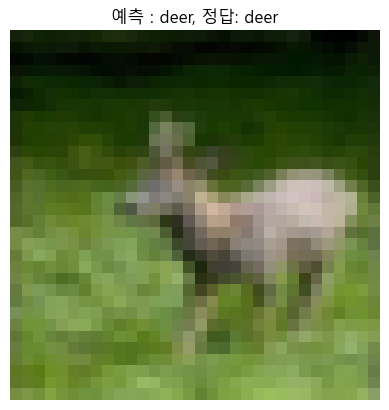

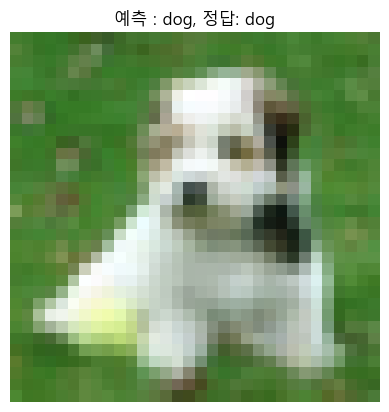

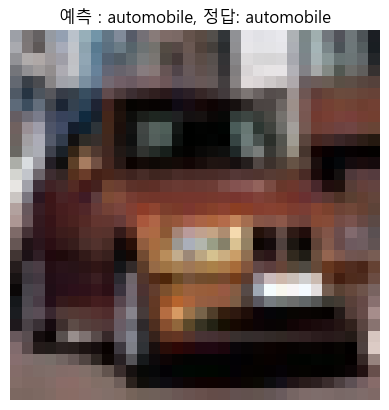

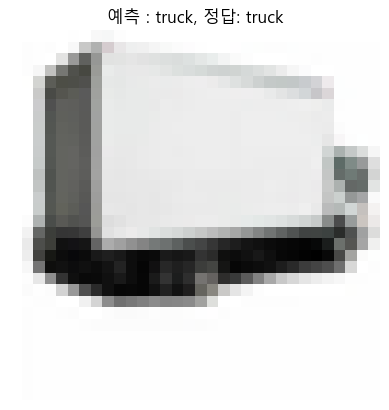

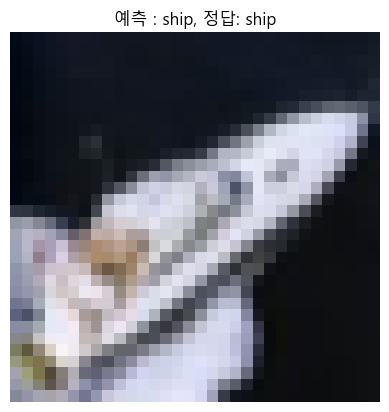

In [16]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# CIFAR-10 데이터셋 불러오기
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# 데이터 정규화
x_train, x_test = x_train / 255.0, x_test / 255.0

# 모델 로드
model = tf.keras.models.load_model('cifar10_model.h5')

# 테스트 데이터셋으로 예측 수행
predictions = model.predict(x_test)

# 예측 결과 확인
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# 무작위로 몇 개의 이미지를 선택해서 예측 결과를 확인합니다.
num_images_to_show = 5
random_indices = np.random.choice(range(len(x_test)), num_images_to_show, replace=False)

for idx in random_indices:
    prediction = np.argmax(predictions[idx])
    ground_truth = y_test[idx][0]
    class_name = class_names[prediction]
    true_class_name = class_names[ground_truth]

    # 이미지 출력
    plt.rcParams['font.family'] = 'Malgun Gothic'
    plt.imshow(x_test[idx])
    plt.title(f"예측 : {class_name}, 정답: {true_class_name}")
    plt.axis('off')
    plt.show()


# 정답률 망..